## Fuji descent issue

### Reading the dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray

csv_path = "mtfuji_data.csv"
data = pd.read_csv(csv_path)

print(data.head())


   x        lat         lng  elevation  distance
0  0  35.134141  139.132082        0.0         0
1  1  35.135826  139.129202        0.0       322
2  2  35.137510  139.126322        0.0       644
3  3  35.139194  139.123441        0.0       966
4  4  35.140878  139.120560        0.0      1288


### Problem 1: Data visualization

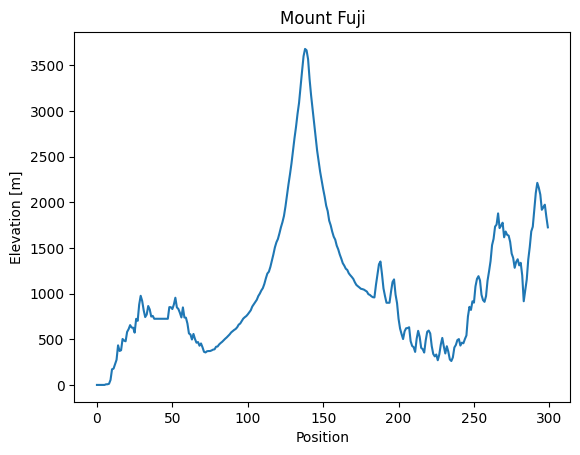

In [18]:
fuji_elevation = data['elevation']

plt.title("Mount Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation [m]")
plt.plot(fuji_elevation)
plt.show()

### Problem 2: Create a function to calculate the gradient at a certain point

In [19]:
def compute_gradient_at(_point: int):
    try:
        change_in_y = fuji_elevation[_point+1] - fuji_elevation[_point]
        change_in_x = (_point + 1) - _point
        gradient = change_in_y / change_in_x
        return gradient    
    except KeyError: return None # Elevation data does not include _point





### Problem 3: Create a function to calculate the destination point

In [20]:
def compute_destination(_point: int, _alpha: float = 0.2) -> int:
    if _alpha <= 0: return None
    gradient = compute_gradient_at(_point)
    destination = int(np.rint(_point - _alpha * gradient))
    
    try: fuji_elevation[destination]
    except KeyError: return None
    else: return destination
    

### Problem 4: Create a function to go down the mountain

In [21]:
def descend_mountain(current_location: int = 136, _alpha: float = 0.2) -> ndarray:
    
    try: fuji_elevation[current_location]
    except KeyError: return np.ndarray([]), np.ndarray([])
    
    visited_locations = np.array([current_location])
    visited_elevations = np.array([fuji_elevation[current_location]])
    next_location = compute_destination(current_location)
    while next_location is not None and \
            next_location != visited_locations[-1] and\
            fuji_elevation[next_location] < visited_elevations[-1]:
        
            visited_locations = np.append(visited_locations, next_location)
            visited_elevations = np.append(visited_elevations, fuji_elevation[next_location])
            current_location = next_location
            next_location = compute_destination(current_location)
    return visited_locations, visited_elevations


### Problem 5: Visualization of the descent process

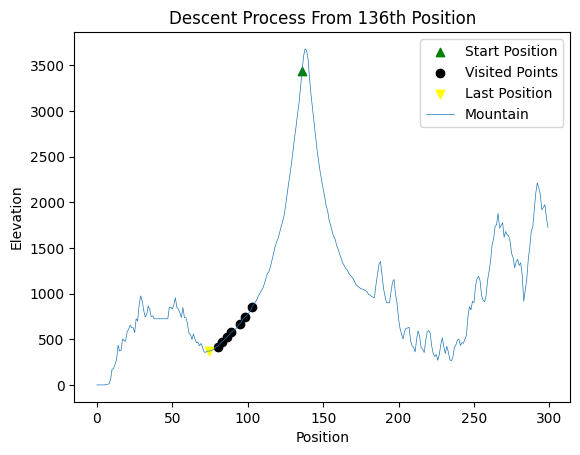

In [22]:
positions, elevations = descend_mountain()
plt.title("Descent Process From 136th Position")
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.scatter(positions[0], elevations[0], color='green', marker='^') #First Location X Elevation 
plt.scatter(positions[1:-2], elevations[1:-2], color='black') # Location X Elevation 
plt.scatter(positions[-1], elevations[-1], color='yellow', marker='v') #Last Location X Elevation 
plt.plot(fuji_elevation, linewidth=0.5)
plt.legend(["Start Position", "Visited Points", "Last Position", "Mountain"])
plt.show()

### Problem 6: Change of initial value

In [23]:
initial_value_1 = 136
initial_value_2 = 142
initial_value_3 = 265

positions1, elevations1 = descend_mountain(current_location=initial_value_1)
positions2, elevations2 = descend_mountain(current_location=initial_value_2)
positions3, elevations3 = descend_mountain(current_location=initial_value_3)

### Problem 7: Visualization of the descent process for each initial value

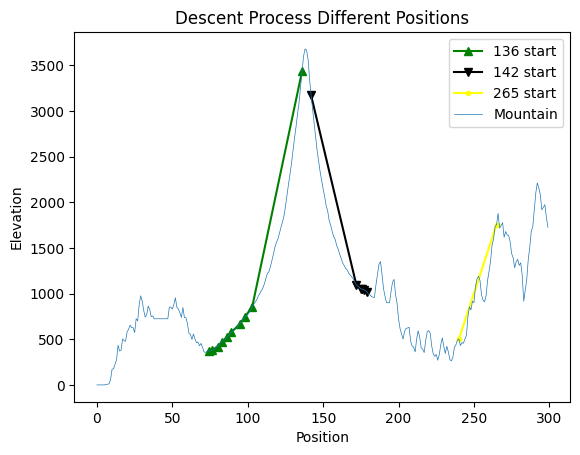

In [24]:
plt.title("Descent Process Different Positions")
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.plot(positions1, elevations1, color='green', marker='^')  
plt.plot(positions2, elevations2, color='black', marker='v')  
plt.plot(positions3, elevations3, color='yellow', marker='.')
plt.plot(fuji_elevation, linewidth=0.5)
plt.legend([f"{initial_value_1} start", f"{initial_value_2} start", f"{initial_value_3} start", "Mountain"])
plt.show()

### Problem 8: (Advance problem) Hyperparameter changes

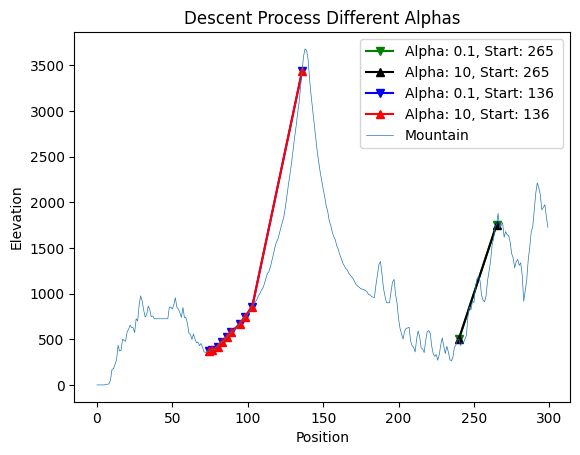

In [25]:
alpha1 = 0.1
alpha2 = 10

positions1, elevations1 = descend_mountain(current_location=initial_value_3, _alpha=0.1)
positions2, elevations2 = descend_mountain(current_location=initial_value_3, _alpha=100)
positions3, elevations3 = descend_mountain(current_location=initial_value_1, _alpha=0.1)
positions4, elevations4 = descend_mountain(current_location=initial_value_1, _alpha=100)

plt.title("Descent Process Different Alphas")
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.plot(positions1, elevations1, color='green', marker='v')  
plt.plot(positions2, elevations2, color='black', marker='^')
plt.plot(positions3, elevations3, color='blue', marker='v')  
plt.plot(positions4, elevations4, color='red', marker='^')
plt.plot(fuji_elevation, linewidth=0.5)
plt.legend([f"Alpha: {alpha1}, Start: {initial_value_3} ", 
            f"Alpha: {alpha2}, Start: {initial_value_3} ", 
            f"Alpha: {alpha1}, Start: {initial_value_1} ", 
            f"Alpha: {alpha2}, Start: {initial_value_1} ",
            "Mountain"])
plt.show()